temperatura do 1100K -modelVF   'Dane-VFmniejsze1.csv'
temperatura do 1300K - modelVF   'daneT800-1300K.csv'

In [47]:

from keras.models import Sequential
from keras.layers import Dense
from keras.models import model_from_json
import numpy
import os
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from keras.models import model_from_json
import numpy
import os
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import pickle
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow import keras
import pylab
import numpy as np
from sklearn.preprocessing import MinMaxScaler

import warnings
warnings.filterwarnings("ignore")


from keras import backend as K
import os

def set_keras_backend(backend):

    if K.backend() != backend:
        os.environ['KERAS_BACKEND'] = backend
        reload(K)
        assert K.backend() == backend

set_keras_backend("tensorflow")

nazwa1 = 'porownanie6_1.2_r_skalowanie'
json_file = open('C:\\Users\\Ola\\Desktop\\praca magisterska\\wykresy/%s.json' %nazwa1, 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = tf.keras.models.model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights('C:\\Users\\Ola\\Desktop\\praca magisterska\\wykresy/%s.h5' %nazwa1)
print("Loaded ANN model from disk")

nazwa2 = 'model2'
pkl_filename = "model2.pkl" 
with open(pkl_filename, 'rb') as file:  
    pickle_model = pickle.load(file)
print("Loaded ML model from disk")

Loaded ANN model from disk
Loaded ML model from disk


In [28]:
import json
from pprint import pprint

with open('C:\\Users\\Ola\\Desktop\\praca magisterska\\wykresy/%s.json' %nazwa1) as f:
    data = json.load(f)

pprint(data)

{'backend': 'tensorflow',
 'class_name': 'Sequential',
 'config': {'layers': [{'class_name': 'Dense',
                        'config': {'activation': 'relu',
                                   'activity_regularizer': None,
                                   'batch_input_shape': [None, 6],
                                   'bias_constraint': None,
                                   'bias_initializer': {'class_name': 'Zeros',
                                                        'config': {'dtype': 'float32'}},
                                   'bias_regularizer': None,
                                   'dtype': 'float32',
                                   'kernel_constraint': None,
                                   'kernel_initializer': {'class_name': 'GlorotUniform',
                                                          'config': {'dtype': 'float32',
                                                                     'seed': None}},
                                   'kern

In [3]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

#zmiana csv!!! 
dane = pd.read_csv('daneT800-1500K.csv', sep = ";")
array = dane.values
x_data1 = dane.drop(['Cd'],axis=1)
y_val = dane[['Cd']].as_matrix()

scaler = MinMaxScaler()
scalerx = scaler.fit(x_data1)
x_data = scaler.transform(x_data1)


x_datas=pd.DataFrame(x_data, columns=['T','VF',  'Tr','l_tpb','E',  'i'])



X_train, X_test, y_train, y_test = train_test_split(x_datas,y_val,test_size=0.3,random_state=101)
X_test1 = X_test.as_matrix()
X_tst = scalerx.inverse_transform(X_test1)
X_tst = pd.DataFrame(X_tst)

x_data1



,T,VF,Tr,l_tpb,E,i
0,800,0.2,2,3,1.087036,0.00
1,800,0.2,2,3,1.087036,0.03
2,800,0.2,2,3,1.087036,0.06
3,800,0.2,2,3,1.087036,0.09
4,800,0.2,2,3,1.087036,0.12
5,800,0.2,2,3,1.087036,0.15
6,800,0.2,2,3,1.087036,0.18
7,800,0.2,2,3,1.087036,0.21
8,800,0.2,2,3,1.087036,0.24
9,800,0.2,2,3,1.087036,0.27


In [4]:
optimizer = tf.train.RMSPropOptimizer(0.001)

loaded_model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae'])


                     
[loss, mae] = loaded_model.evaluate(X_test.values, y_test, verbose=0)

print("Testing set Mean Abs Error: {:7.2f}".format(mae ))


Instructions for updating:
Use tf.cast instead.
Testing set Mean Abs Error: 10308.42


In [5]:
test_predictions = loaded_model.predict(x_datas.values).flatten()
print(test_predictions)

[-150.34583 -150.3584  -150.36926 ... -150.47925 -150.48035 -150.48157]


In [6]:

dane_pred = pd.DataFrame(test_predictions, columns=['pred'])
y_val = pd.DataFrame(y_val, columns = ['value'])
x_data = pd.DataFrame(x_data1, columns=['T','VF',  'Tr','l_tpb','E',  'i'])

porownanie = pd.concat([x_data, dane_pred, y_val, x_datas], axis =1)


porownanie.to_csv('porownanieread212.csv', sep=',')
porownanie

,T,VF,Tr,l_tpb,E,i,pred,value,T,VF,Tr,l_tpb,E,i
0,800,0.2,2,3,1.087036,0.00,-150.345825,0.000000,0.0,0.0,0.0,0.0,0.493095,0.0
1,800,0.2,2,3,1.087036,0.03,-150.358398,3.303537,0.0,0.0,0.0,0.0,0.493095,0.1
2,800,0.2,2,3,1.087036,0.06,-150.369263,6.764090,0.0,0.0,0.0,0.0,0.493095,0.2
3,800,0.2,2,3,1.087036,0.09,-150.378418,10.546135,0.0,0.0,0.0,0.0,0.493095,0.3
4,800,0.2,2,3,1.087036,0.12,-150.386841,14.829433,0.0,0.0,0.0,0.0,0.493095,0.4
5,800,0.2,2,3,1.087036,0.15,-150.394165,19.817565,0.0,0.0,0.0,0.0,0.493095,0.5
6,800,0.2,2,3,1.087036,0.18,-150.400635,25.747614,0.0,0.0,0.0,0.0,0.493095,0.6
7,800,0.2,2,3,1.087036,0.21,-150.406738,32.901433,0.0,0.0,0.0,0.0,0.493095,0.7
8,800,0.2,2,3,1.087036,0.24,-150.412231,41.619038,0.0,0.0,0.0,0.0,0.493095,0.8
9,800,0.2,2,3,1.087036,0.27,-150.417114,52.314772,0.0,0.0,0.0,0.0,0.493095,0.9


In [7]:
def scaler (X, min, max):
    X1 = (X-min)/(max-min)
    return X1
def rescaler(X1, min, max):
    X = X1*(max-min)+min
    return X

In [8]:
x_data1['T'].max()

1400

In [9]:
Dane_eksperymentalne_X_1273 = [57.6083,109.693,154.426,202.006,246.169,308.641]
Dane_eksperymentalne_Y_1273 = [0.014856,0.0226306,0.0301458,0.0349322,0.0394077,0.0460601]
Dane_eksperymentalne_X_1173 = [45.6925, 106.432, 147.833, 204.783, 252.943, 302.009]
Dane_eksperymentalne_Y_1173 = [0.0293997, 0.0404605, 0.0507099, 0.0618844, 0.0704109, 0.0797427]
Dane_eksperymentalne_X_1073 = [52.8008, 103.521, 148.03, 203.438, 250.446, 299.169]
Dane_eksperymentalne_Y_1073 = [0.0610294, 0.0825527, 0.0977485, 0.114673, 0.130445, 0.141099]

In [20]:
global ANN
global ML
ML = ''
ANN = ''
nazwa = ''

def plot (T,VF, l, tortuosity,
         T1, VF1, l1, tortuosity1,
         T2, VF2, l2, tortuosity2
         ,model):
    
   
  
    F = 96485
    R = 8.3145
                
    p_h2 = 97000
    p_h2o = 3000
                    
             
                
    L = 0.00005
    alpha = 0.5
    l_tpb = l*10**12
    l_tpb1 = l1*10**12
    l_tpb2 = l2*10**12
                

#math
    b = R*T/(F*alpha)
    
    i0_an = 31.4*l_tpb*p_h2**(-0.03)*p_h2o**(0.4)*np.exp(-152155/(T*R))
    sigma_ion = 3.4*10000*np.exp(-10350/T)
    sigma_ion_eff = sigma_ion*VF/tortuosity
    
    
    epsilon2 = (sigma_ion_eff*b)/(2*i0_an*L**2)
    epsilon = np.sqrt(epsilon2)
    
    b1 = R*T1/(F*alpha)
    
    i0_an1 = 31.4*l_tpb1*p_h2**(-0.03)*p_h2o**(0.4)*np.exp(-152155/(T1*R))
    sigma_ion1 = 3.4*10000*np.exp(-10350/T1)
    sigma_ion_eff1 = sigma_ion1*VF1/tortuosity1
    
    
    epsilon21 = (sigma_ion_eff1*b1)/(2*i0_an1*L**2)
    epsilon1 = np.sqrt(epsilon21)
    
    b2 = R*T2/(F*alpha)
    
    i0_an2 = 31.4*l_tpb2*p_h2**(-0.03)*p_h2o**(0.4)*np.exp(-152155/(T2*R))
    sigma_ion2 = 3.4*10000*np.exp(-10350/T2)
    sigma_ion_eff2 = sigma_ion2*VF2/tortuosity2
    
    
    epsilon22 = (sigma_ion_eff2*b2)/(2*i0_an2*L**2)
    epsilon2 = np.sqrt(epsilon22)

    

    Dane_eksperymentalne_X_1173 = [45.6925, 106.432, 147.833, 204.783, 252.943, 302.009]
    Dane_eksperymentalne_Y_1173 = [0.0293997, 0.0404605, 0.0507099, 0.0618844, 0.0704109, 0.0797427]
    Dane_eksperymentalne_X_1073 = [52.8008, 103.521, 148.03, 203.438, 250.446, 299.169]
    Dane_eksperymentalne_Y_1073 = [0.0610294, 0.0825527, 0.0977485, 0.114673, 0.130445, 0.141099]
    Dane_eksperymentalne_X_1273 = [57.6083,109.693,154.426,202.006,246.169,308.641]
    Dane_eksperymentalne_Y_1273 = [0.014856,0.0226306,0.0301458,0.0349322,0.0394077,0.0460601]

                    
    
    
    x = np.array ([0.00, 0.03, 0.06, 0.09, 0.12, 0.15, 0.18, 0.21, 0.24, 0.27, 0.3])
    
    
    Ts = scaler(T, x_data1['T'].min(), x_data1['T'].max())
    epsilons = scaler(epsilon, x_data1['E'].min(), x_data1['E'].max())
    ls = scaler(l, x_data1['l_tpb'].min(), x_data1['l_tpb'].max())
    tortuositys = scaler(tortuosity, x_data1['Tr'].min(), x_data1['Tr'].max())
    VFs = scaler(VF, x_data1['VF'].min(), x_data1['VF'].max())
    Ts1 = scaler(T1, x_data1['T'].min(), x_data1['T'].max())
    epsilons1 = scaler(epsilon1, x_data1['E'].min(), x_data1['E'].max())
    ls1 = scaler(l1, x_data1['l_tpb'].min(), x_data1['l_tpb'].max())
    tortuositys1 = scaler(tortuosity1, x_data1['Tr'].min(), x_data1['Tr'].max())
    VFs1 = scaler(VF1, x_data1['VF'].min(), x_data1['VF'].max())
    Ts2 = scaler(T2, x_data1['T'].min(), x_data1['T'].max())
    epsilons2 = scaler(epsilon2, x_data1['E'].min(), x_data1['E'].max())
    ls2 = scaler(l2, x_data1['l_tpb'].min(), x_data1['l_tpb'].max())
    tortuositys2 = scaler(tortuosity2, x_data1['Tr'].min(), x_data1['Tr'].max())
    VFs2 = scaler(VF2, x_data1['VF'].min(), x_data1['VF'].max())
    iS = scaler(x, 0, 0.3)
   
    xnew = np.linspace(0.0, 0.3, 50)
    
    data = {'T': np.repeat(T, len(x)), 
            'VF':np.repeat(VF, len(x)),
            'Tr' : np.repeat(tortuosity, len(x)),
            'l_tpb' : np.repeat(l,len(x)),
            'E': np.repeat(epsilon, len(x)), 
            
            'i' :  iS,
            }
    
    
    datas = {'T': np.repeat(Ts, len(x)), 
            'VF':np.repeat(VFs, len(x)),
            'Tr' : np.repeat(tortuositys, len(x)),
            'l_tpb' : np.repeat(ls,len(x)),
            'E': np.repeat(epsilons, len(x)), 
            
            'i' : iS,
            }
    datas1 = {'T': np.repeat(Ts1, len(x)), 
            'VF':np.repeat(VFs1, len(x)),
            'Tr' : np.repeat(tortuositys1, len(x)),
            'l_tpb' : np.repeat(ls1,len(x)),
            'E': np.repeat(epsilons1, len(x)), 
            
            'i' : iS,
            }
        
    datas2 = {'T': np.repeat(Ts2, len(x)), 
            'VF':np.repeat(VFs2, len(x)),
            'Tr' : np.repeat(tortuositys2, len(x)),
            'l_tpb' : np.repeat(ls2, len(x)),
            'E': np.repeat(epsilons2, len(x)), 
            
            'i' : iS,
            }   
    
    x_data = pd.DataFrame(data = data, columns=['T','VF','Tr','l_tpb','E', 'i'])
   
    x_datas = pd.DataFrame(data = datas, columns=['T','VF','Tr','l_tpb','E', 'i'])
    
    x_datas1 = pd.DataFrame(data = datas1, columns=['T','VF','Tr','l_tpb','E', 'i'])
    
    x_datas2 = pd.DataFrame(data = datas2, columns=['T','VF','Tr','l_tpb','E', 'i'])
    
    if model == 'ANN':
        
    
        pred11 = loaded_model.predict(x_datas.values).flatten()
        pred1 = pred11/10
        pred22 = loaded_model.predict(x_datas1.values).flatten()
        pred2 = pred22/10
        pred33 = loaded_model.predict(x_datas2.values).flatten()
        pred3 = pred33/10
        pred1[0]=0
        pred2[0]=0
        pred3[0]=0
        coto = 'ANN'
        nazwa = nazwa1
        
    else:
        
        pred11 = pickle_model.predict(x_datas.values)
        pred1 = pred11/10
        pred22 = pickle_model.predict(x_datas1.values)
        pred2 = pred22/10
        pred33 = pickle_model.predict(x_datas2.values)
        pred3 = pred33/10
        pred1[0]=0
        pred2[0]=0
        pred3[0]=0
        coto = 'ML'
        nazwa = nazwa2
        
  
    
    array = x_data.values
    X = array[:,4]
    
    etab = x/b
    etab1 = x/b1
    etab2 = x/b2
    

    y11 = (sigma_ion_eff/L)*b*1/epsilon*np.sinh(etab)*(np.sinh(1/epsilon)/np.cosh(1/epsilon))
    y1 = y11/10
    y22 = (sigma_ion_eff1/L)*b1*1/epsilon1*np.sinh(etab1)*(np.sinh(1/epsilon1)/np.cosh(1/epsilon1))
    y2 = y22/10
    y33 = (sigma_ion_eff2/L)*b2*1/epsilon2*np.sinh(etab2)*(np.sinh(1/epsilon2)/np.cosh(1/epsilon2))
    y3 = y33/10
    
    plt.figure(facecolor='white')
    plt.style.use('classic')
    #plt.ylim(-0.0,0.3)
#     #plt.xlim(0, 3000)
    
    z1 = np.polyfit(x, pred1, 2)
    p1 = np.poly1d(z1)
    p1[0]=0
    z2 = np.polyfit(x, pred2, 1)
    p2 = np.poly1d(z2)
    p2[0]=0
    z3 = np.polyfit(x, pred3, 1)
    p3 = np.poly1d(z3)
    p3[0]=0
    xnew1 = np.linspace(0, Dane_eksperymentalne_Y_1073[5]+0.1515, 50)
    xnew2 = np.linspace(0, Dane_eksperymentalne_Y_1173[5]+0.035, 50)
    xnew3 = np.linspace(0, Dane_eksperymentalne_Y_1273[5]+0.004, 50)
    
    
    
    
    epsilon = round(epsilon, 4)
    epsilon1 = round(epsilon1, 4)
    epsilon2 = round(epsilon2, 4)
    
   
#   #$\mathregular{e^{\sin(\omega\phi)}}$
    plt.figure(figsize=(10,5), facecolor='white')
    plt.xlabel(r'Gęstość prądu $\mathregular{({mA}{cm^{-2}})}$', size = 16)
    plt.ylabel('Nadpotencjał (V)', size = 16)  
    plt.title('Porównanie wyników dla parametrów mikrostruktury')
    plt.plot(p1(xnew1), xnew1,'b' , label = 'SNN 1073K' )
    #plt.plot(y1, x, 'k', label='Benchmark $\it{T}$= %s [-]' %(T))
    plt.plot(p2(xnew2), xnew2,'r', label = 'SNN 1173K' )
    #plt.plot(y2, x, 'k' , label='Benchmark $\it{T}$= %s [-]' %(T1))
    plt.plot(p3(xnew3), xnew3,'k' , label = 'SNN 1273K' )
    #plt.plot(y3, x, 'k' , label='Benchmark $\it{T}$= %s [-]' %(T2))
    #plt.plot(pred1, x, 'rx' , label = '$\mathit{predicted}$')
    plt.plot(Dane_eksperymentalne_X_1073, Dane_eksperymentalne_Y_1073, 'b^',
            label = '1073K ex')
    plt.plot(Dane_eksperymentalne_X_1173, Dane_eksperymentalne_Y_1173, 'r.',
            label = '1173K ex')
    plt.plot(Dane_eksperymentalne_X_1273, Dane_eksperymentalne_Y_1273,'ks', label = '1273K ex')
    
    plt.legend(loc='best', numpoints = 1, ncol = 2, frameon= False)
    #plt.savefig('wyniki_ANN_benchmark.png', dpi= 400)
    print('T= %s, l_tpb= %s, τ  = %s, ε= %s, model = %s'%(T, l, tortuosity, epsilon2, coto))
    plt.savefig('C:\\Users\\Ola\\Desktop\\praca magisterska\\wykresy/porownanie_%s_Kishimoto(%s).png' % (coto, nazwa), dpi= 400)
    plt.grid(True)
    plt.show()
    
    #print (i0_an, sigma_ion, sigma_ion_eff )
   
    #print( pred1, pred2, pred3)

T= 1075, l_tpb= 2.5, τ  = 8.25, ε= 0.13, model = ML


<Figure size 640x480 with 0 Axes>

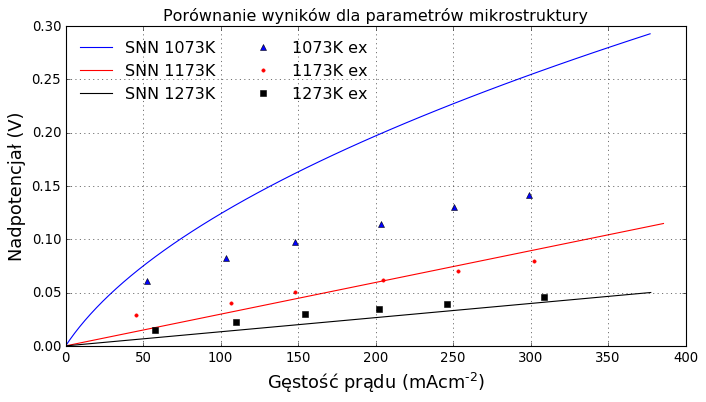

In [49]:


plot (1075, 0.25, 2.5, 8.25,
     1175, 0.25, 2.5, 8.25,
     1275, 0.25, 2.5, 8.25
     ,'ML')

    

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import mark_inset
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
import matplotlib.ticker as ticker

def plot_history(history):
    plt.figure(facecolor='white')
    
    if history == history1 :
        nr = 2 
    else :
        nr = 1
    
  
    error = np.array(history.history['mean_absolute_error'])
    errorval = np.array(history.history['val_mean_absolute_error'])
    
  

#     plt.ylabel('Mean Abs Error ')
#     plt.plot(history.epoch, error,
#            label='Train Loss')
#     plt.plot(history.epoch, errorval,
#            label = 'Val loss')
  
    fig, ax = plt.subplots(figsize=[10, 5], facecolor='white', sharex=True)
    #fig.set_figheight(1)
    #fig.set_figwidth(1)
#     ax.figure(facecolor='white')
#     ax.style.use('classic')
#     ax.xlabel('Epoch')
#     plt.ylabel('Mean Abs Error ')

    if nr == 1 :
        
        ax.plot(history.epoch, error, 'b--',
           label='Train Loss')
        ax.plot(history.epoch, errorval, 'g',
           label = 'Val loss')
    else:
        ax.plot(history.epoch, error, 'k--',
           label='Train Loss')
        ax.plot(history.epoch, errorval, 'r',
           label = 'Val loss')
        

  
    axins = zoomed_inset_axes(ax, 3, loc=1)
    
    if nr == 1 :
        axins.plot(history.epoch, error, 'b--')
        axins.plot(history.epoch, errorval, 'g') 
    else:
        
        axins.plot(history.epoch, error, 'k--')
        axins.plot(history.epoch, errorval, 'r') 
    
    x1, x2, y1, y2 = history.epoch[-50], history.epoch[-1], 0, errorval[-1]+500 # specify the limits
    axins.set_xlim(x1, x2) # apply the x-limits
    axins.set_ylim(y1, y2)
    #axins.xaxis.set_visible(True)
    axins.tick_params(axis='both', which='major', labelsize=8, labelcolor = 'k')
    #ax.xaxis.set_ticks(3)
    xticklabels = x1, (x2+x1)*0.5, x2
    yticklabels = y1, (y2+y1)/2, y2
    axins.xaxis.set_major_locator(ticker.FixedLocator(xticklabels))
    axins.yaxis.set_major_locator(ticker.FixedLocator(yticklabels))
    #axins.tick_params(axis=u'both', which=u'both',length=50)
    #axins.yaxis.set_visible(True)
    ax.legend(['Dane uczące sieć nr. %s' %nr, 'Dane walidacyjne sieć nr. %s' %nr], loc = 2)
    mark_inset(ax, axins, loc1=3, loc2=4, fc="none", ec="0.5")
    
    #print(fig.size)

    ax.set_xlabel('Epoch', fontsize=15)
    ax.set_ylabel('średni błąd' , fontsize=15)
    ax.grid(True)

In [ ]:
loaded_model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae'])
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=40)

history1 = loaded_model.fit(X_train, y_train, epochs=1000,
                    validation_split=0.2, verbose=0,
                    callbacks=[early_stop])

In [ ]:
import keras
from keras.models import load_model
from keras.utils import CustomObjectScope
from keras.initializers import glorot_uniform







json_file = open('C:\\Users\\Ola\\Desktop\\praca magisterska\\wykresy/porownanie3_1.1.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = tf.keras.models.model_from_json(loaded_model_json)

loaded_model.load_weights("porownanie3_1.1.h5")
print("Loaded model from disk")
optimizer = tf.train.RMSPropOptimizer(0.001)

loaded_model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae'])


                     
[loss, mae] = loaded_model.evaluate(X_test.values, y_test, verbose=0)

print("Testing set Mean Abs Error: {:7.2f}".format(mae ))

In [ ]:
with open('C:\\Users\\Ola\\Desktop\\praca magisterska\\wykresy/porownanie3_4.2_se.json') as f:
    data = json.load(f)

pprint(data)